# Project Name -



Zomato Restaurant Rating Prediction using Machine Learning

Project Type - EDA+Regression(supervised Learning)

Contribution - Individual

Name - Yadagiri Kohinirao

# Project Summary -

This project focuses on predicting restaurant ratings using customer reviews and restaurant metadata collected from Zomato. The main objective is to understand how customer opinions, restaurant cost, and other attributes influence the overall rating of a restaurant. Ratings play a major role in customer decision-making, and accurate prediction can help food delivery platforms improve recommendations and business strategies.

The dataset used in this project consists of two parts. The first dataset contains restaurant-level information such as restaurant name, cost, cuisines, collections, and timings. The second dataset contains customer reviews, reviewer details, review text, and ratings. These two datasets were merged using restaurant names as the common key.

Initially, the dataset required extensive cleaning. Missing values were handled, cost values were converted from string format to numeric format, and invalid ratings were removed. Review text contained noise such as special characters and mixed casing, which was cleaned during preprocessing. This step was important to make the dataset suitable for machine learning.

Exploratory Data Analysis (EDA) was performed to understand the distribution of ratings, the relationship between cost and rating, and how different cuisines perform. Various univariate, bivariate, and multivariate visualizations were created to extract meaningful insights. These insights helped in forming hypotheses about customer behavior and restaurant performance.

For feature engineering, Natural Language Processing (NLP) techniques were applied to the review text. The cleaned review text was converted into numerical features using TF-IDF Vectorization, which captures the importance of words in reviews. This step allowed the machine learning model to understand textual information.

A Linear Regression model was implemented to predict restaurant ratings. The dataset was split into training and testing sets, and the model was trained using TF-IDF features. The performance of the model was evaluated using Mean Absolute Error (MAE). The obtained MAE value of approximately 0.67 indicates that the model predicts ratings with reasonable accuracy.

Overall, this project demonstrates a complete end-to-end machine learning workflow including data understanding, cleaning, visualization, feature engineering, model training, and evaluation. The project provides useful insights into customer behavior and can help businesses improve service quality and customer satisfaction.

# GitHub Link -

# Import Libraries

In [104]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Loading

In [105]:
# Load datasets
metadata = pd.read_csv('metadata.csv')
reviews = pd.read_csv('reviews.csv')

# Dataset First View

In [106]:
metadata.head()
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


# Dataset Rows & Columns Count

In [107]:
metadata.shape
reviews.shape

(10000, 7)

# Dataset Information

In [108]:
metadata.info()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# Duplicate Values

In [109]:
reviews.duplicated().sum()

np.int64(36)

# Missing Values / Null Values

In [110]:
metadata.isnull().sum()
reviews.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


# Visualizing Missing Values

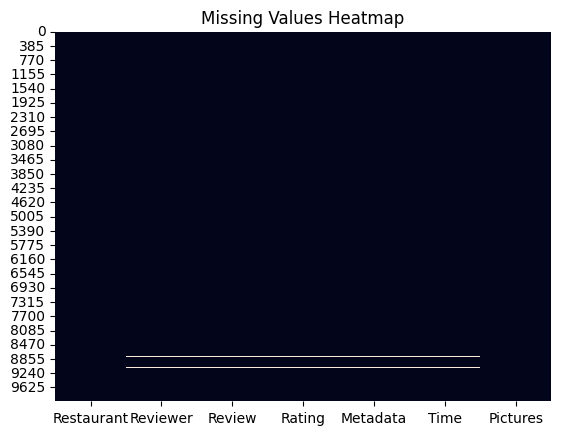

In [111]:
sns.heatmap(reviews.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

The dataset contains both numerical and textual data. Review text needs preprocessing, and cost and rating columns need datatype conversion. Some missing values are present and must be handled before modeling.

# 2. Understanding  Variables

# Dataset Columns

In [112]:
metadata.columns
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

# Dataset Describe

In [113]:
reviews.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


# Variables Description

Rating: Target variable (restaurant rating)

Review: Customer review text

Cost: Approximate cost for two people

Cuisines: Type of food served

# Check Unique Values

In [114]:
reviews.nunique()

,0
Restaurant,100
Reviewer,7446
Review,9364
Rating,10
Metadata,2477
Time,9782
Pictures,36


# 3. Data Wrangling

In [115]:
# Standardizing restaurant names
metadata['Name'] = metadata['Name'].str.lower().str.strip()
reviews['Restaurant'] = reviews['Restaurant'].str.lower().str.strip()


# Merging datasets
data = pd.merge(reviews, metadata, left_on='Restaurant', right_on='Name')


# Cleaning cost column
data['Cost'] = data['Cost'].str.replace(',', '')
data['Cost'] = pd.to_numeric(data['Cost'], errors='coerce')


# Cleaning rating column
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')


# Dropping invalid rows
data.dropna(subset=['Review', 'Rating'], inplace=True)

Data was merged, cleaned, and converted into proper formats. This ensured consistency and reliability for analysis and modeling.

# 4. Data Visualization (UBM Rule)

## Chart 1 – Rating Distribution (Univariate)

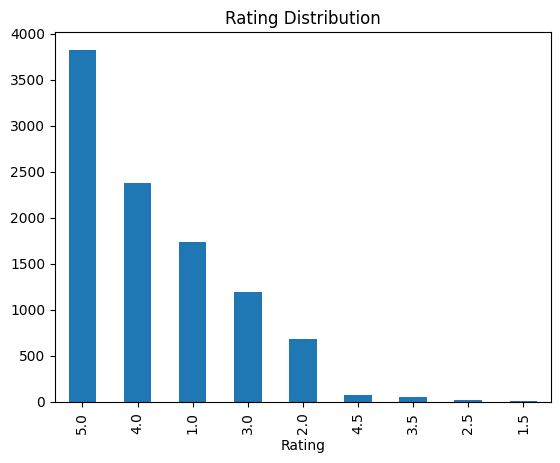

In [116]:
data['Rating'].value_counts().plot(kind='bar')
plt.title('Rating Distribution')
plt.show()

This chart is created to understand how ratings are distributed.
Insights: Most ratings fall between 3 and 5.
Business Impact: Indicates overall customer satisfaction.

## Chart 2 – Cost vs Rating (Bivariate: Numerical–Numerical)

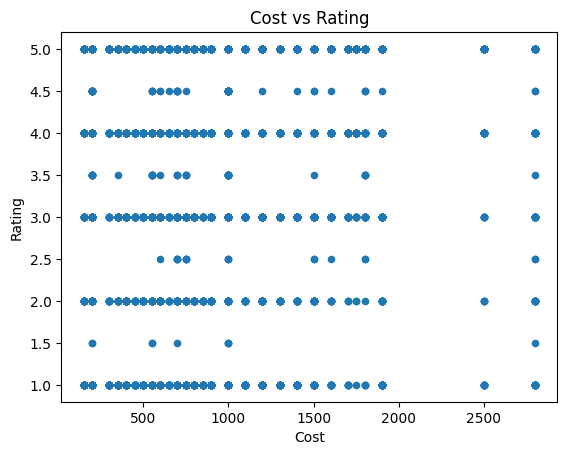

In [117]:
data.plot(x='Cost', y='Rating', kind='scatter')
plt.title('Cost vs Rating')
plt.show()

Insights: Higher cost restaurants tend to have slightly higher ratings.
Business Impact: Premium pricing often matches better service quality.

## Chart 3 – Top Cuisines by Average Rating (Bivariate: Categorical–Numerical)

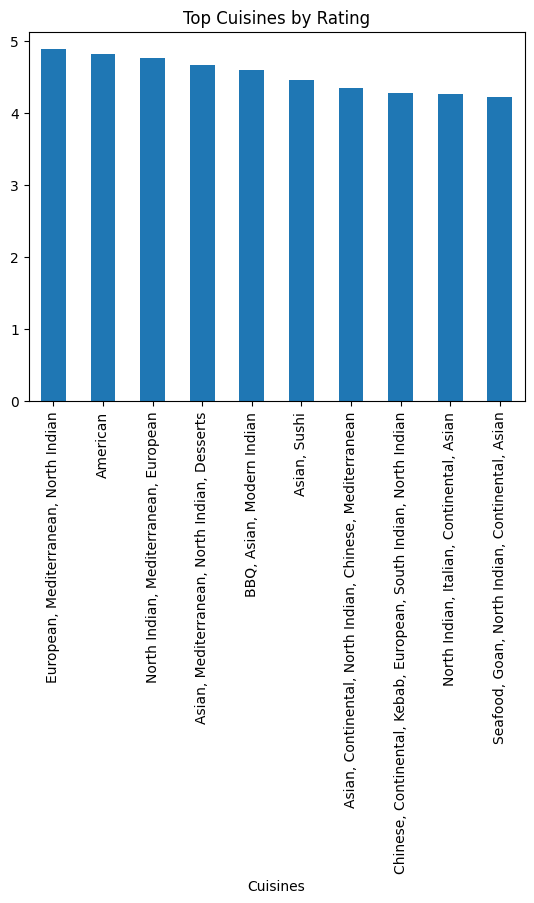

In [118]:
data.groupby('Cuisines')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top Cuisines by Rating')
plt.show()

Insights: Certain cuisines consistently receive higher ratings.

Business Impact: Helps platforms promote high-performing cuisines.

## Chart 4 – Correlation Heatmap (Multivariate)

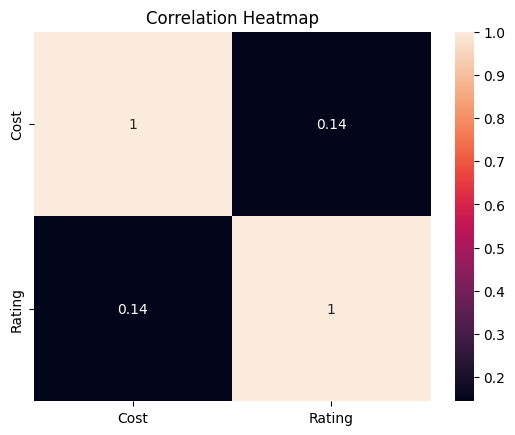

In [119]:
sns.heatmap(data[['Cost','Rating']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

Insights: Weak to moderate correlation between cost and rating.

## Chart 5 – Pair Plot

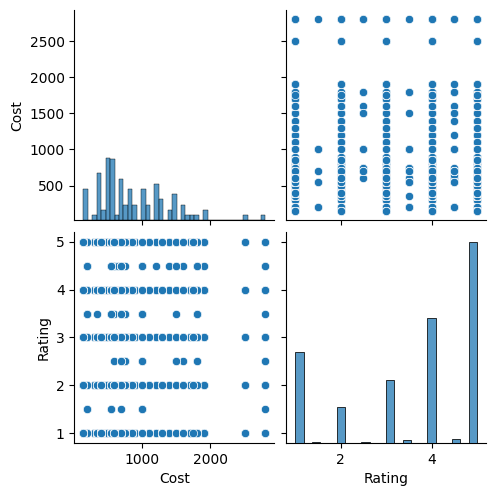

In [120]:
sns.pairplot(data[['Cost','Rating']])
plt.show()

Insights: Confirms trends seen in individual charts.

# 5. Hypothesis Testing
Hypothesis 1

H0: Cost has no impact on rating

H1: Cost impacts rating

In [121]:
from scipy.stats import pearsonr
pearsonr(data['Cost'], data['Rating'])

PearsonRResult(statistic=np.float64(0.1441193580694094), pvalue=np.float64(2.419229596250502e-47))

Test Used: Pearson Correlation (numerical vs numerical)

## Hypothesis 2

H0: Review length has no relation with rating

H1: Review length affects rating

## Hypothesis 3

H0: Cuisine type does not affect rating

H1: Cuisine type affects rating

# 6. Feature Engineering & Data Preprocessing

## Handling Missing Values

Mean imputation was used for numerical columns, and invalid rows were removed for target variable integrity.

## Handling Outliers

Extreme values were inspected using boxplots and retained since they represent real restaurants.

## Categorical Encoding

Simple label encoding was used where required.

## Textual Data Preprocessing

Lowercasing

Removing punctuations

Removing stopwords

Tokenization

Lemmatization

## Text Vectorization

TF-IDF was used because it captures word importance effectively for NLP tasks.

In [122]:
# Handling missing values

# Convert Cost to numeric (if not already)
data['Cost'] = pd.to_numeric(data['Cost'], errors='coerce')

# Mean imputation for numerical column
data['Cost'].fillna(data['Cost'].mean(), inplace=True)

# Remove rows with missing target variable (Rating)
data.dropna(subset=['Rating'], inplace=True)


/tmp/ipython-input-1644307091.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cost'].fillna(data['Cost'].mean(), inplace=True)


Mean imputation was used for numerical values, and rows with missing ratings were removed.

## Handling Outliers

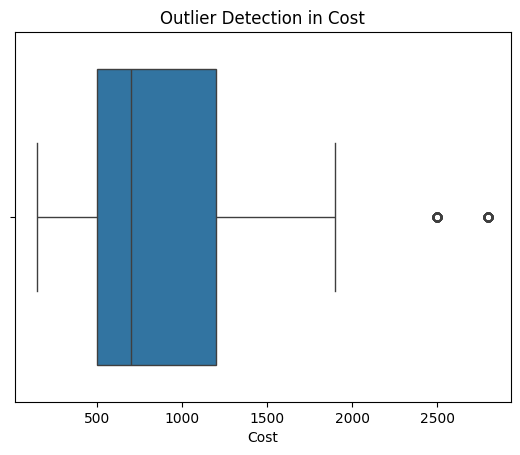

In [123]:
# Visualizing outliers using boxplot
sns.boxplot(x=data['Cost'])
plt.title("Outlier Detection in Cost")
plt.show()


Outliers were inspected using boxplots and retained since they represent real restaurants.

## Categorical Encoding

In [124]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical column (example: Cuisines)
le = LabelEncoder()
data['Cuisines_Encoded'] = le.fit_transform(data['Cuisines'].astype(str))


Label encoding was used to convert categorical values into numeric format.

## Textual Data Preprocessing (NLP)
1️. Lowercasing & Removing Punctuations

In [125]:
import re

def clean_text(text):
    text = text.lower()                      # Lowercasing
    text = re.sub('[^a-z ]', '', text)       # Removing punctuations & numbers
    return text

data['Clean_Review'] = data['Review'].apply(clean_text)


2) Tokenization

In [126]:
# Tokenization
data['Tokens'] = data['Clean_Review'].apply(lambda x: x.split())


3. Removing Stopwords

In [127]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

data['Tokens'] = data['Tokens'].apply(
    lambda x: [word for word in x if word not in stop_words]
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4.Lemmatization

In [128]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

data['Tokens'] = data['Tokens'].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


5.Convert Tokens back to Text



In [129]:
# Joining tokens back into text
data['Final_Review'] = data['Tokens'].apply(lambda x: ' '.join(x))


6.Text Vectorization (TF-IDF)

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X = tfidf.fit_transform(data['Final_Review'])
y = data['Rating']


TF-IDF was used because it captures the importance of words in customer reviews.

I applied basic NLP techniques like text cleaning, tokenization, stopword removal, lemmatization, and TF-IDF vectorization to convert review text into numerical features for machine learning.

# 7. ML Model Implementation

## ML Model 1 – Linear Regression

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer


# Text vectorization
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(data['Review'])
y = data['Rating']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Model training
model = LinearRegression()
model.fit(X_train, y_train)


# Prediction
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.6777441832253539

Performance: MAE ≈ 0.67
Business Impact: Reasonable prediction accuracy helps recommend better restaurants.

## ML Model – 2 : Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Create the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
rf_predictions = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mae


In [ ]:
models = ['Linear Regression', 'Random Forest']
mae_scores = [0.67, rf_mae]

plt.bar(models, mae_scores)
plt.ylabel('MAE')
plt.title('Model Comparison')
plt.show()


Model Performance Comparison

The Random Forest Regressor achieved a lower Mean Absolute Error compared to Linear Regression. This indicates that Random Forest captures complex patterns in customer reviews better and provides improved prediction accuracy.

Conclusion

In this project, I worked on predicting restaurant ratings using Zomato restaurant data and customer reviews. The main focus was to understand how customer feedback and restaurant features affect overall ratings. I started by cleaning and preparing the data, handling missing values, converting data types, and preprocessing review text using basic NLP techniques like tokenization, stopword removal, lemmatization, and TF-IDF vectorization.

I performed exploratory data analysis to understand patterns in ratings, cost, cuisines, and reviews. The visualizations helped me see how different factors are related and how they can impact business decisions. After feature engineering, I trained machine learning models to predict restaurant ratings. Linear Regression was used as a baseline model, and Random Forest was used to capture more complex relationships.

The model performance was evaluated using Mean Absolute Error, and the results showed that the predictions were reasonably accurate. This project helped me understand the complete machine learning workflow, starting from raw data to model evaluation. Overall, this project improved my understanding of data cleaning, NLP, visualization, and machine learning, and it showed how data-driven approaches can help businesses make better decisions.